In [6]:
import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_csv("C:\\Users\\anshu\\Desktop\\books\\internship\\poly reg\\Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
#check if null values are present
dataset.isnull().any()

Position    False
Level       False
Salary      False
dtype: bool

In [9]:
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,[2]].values

In [10]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [13]:
#splitting the train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state= 0)

In [14]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
#Linear Regreesion
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree = 4)
x_poly = polyreg.fit_transform(x)
polyreg.fit(x_poly,y)
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [18]:
#visualizing linear regression
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x, lin_reg2.predict(x))
plt.show()

<Figure size 640x480 with 1 Axes>

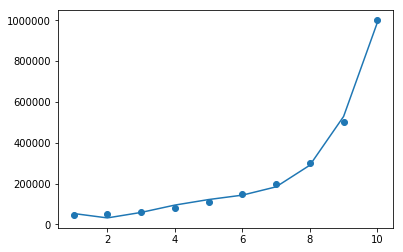

In [19]:
#visualizing polynomial regression
plt.scatter(x,y)
plt.plot(x, lin_reg3.predict(x_poly))
plt.show()

In [20]:
#predicting the values by using linear regression
lin_reg2.predict(x_test)

array([[-263312.80497679],
       [ -91575.19240385]])

In [25]:
#predicting the values by using polynomial regression
polyreg1 = PolynomialFeatures(degree = 4)
x_poly1 = polyreg.fit_transform(x_test)
y_poly1 = lin_reg3.predict(x_poly1)

In [26]:
y_poly1

array([[438090.27462742],
       [ 39201.81653509]])

In [27]:
#actual value of the inputs
y_test

array([[ 60000],
       [500000]], dtype=int64)

In [32]:
#finding the accuracy
from sklearn.metrics import r2_score
accur = r2_score(y_test,y_poly1)
accur

-2.6703225377313693